<a href="https://colab.research.google.com/github/e-done/math-1009/blob/main/mkgraph_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Modules

In [ ]:
! pip install algorithmx
import algorithmx
import networkx as nx
import string
import random
import itertools

# Option 1 : Create Defined Graph

In [ ]:
#
# G = nx.Graph() # for undirected graph
# G = nx.DiGraph() # for directed graph
# G = nx.MultiGraph() # for undirected graph with self-loops or multiple edges that connect the same vertices
# G = nx.MultiDiGraph() # for directed graph with self-loops or multiple edges that connect the same vertices
#
G = nx.Graph()
#
#G.add_edge('A','B',weight=8) # for weighted edges
#G.add_edge('A','B') # for unweighted edges
#
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('C','D')
G.add_edge('D','E')


# Create an edgedict dictionary if you want to label your edges
#edgedict = {}
#edgedict[list(G.edges)[0]] = 'a'
#edgedict[list(G.edges)[1]] = 'b'
#edgedict[list(G.edges)[2]] = 'c'
#edgedict[list(G.edges)[3]] = 'd'


# Option 2 : Create Random Graph

In [ ]:
##########################
# graph settings to edit
numVertices = 7
logicDirected = False
logicWeighted = False
logicLabeled = False
##########################

#percentLink = random.uniform(0.3, 0.7)
percentLink = 0.4
graphSeed = random.randint(1,1000)
print('percentLink =',percentLink)
print('graphSeed =',graphSeed)

G = nx.gnp_random_graph(numVertices, percentLink, seed=graphSeed, directed=logicDirected)
if not logicDirected and not logicWeighted :
  G = nx.Graph(G) # makes it undirected
# remove any nodes that are not connected to anything
G.remove_nodes_from(list(nx.isolates(G)))

# dictionary to map nodes to A, B, C, ..., Z, AA, AB, AC, ...
def iter_all_upper() :
  for size in itertools.count(1) :
    for s in itertools.product(string.ascii_uppercase, repeat=size) :
      yield "".join(s)
nodedict = {}
i=0
for s in iter_all_upper() :
  e = list(G.nodes)[i]
  nodedict[i] = s
  i+=1
  if i==len(G.nodes) :
    break
G = nx.relabel_nodes(G, nodedict)

# dictionary to map edges to a, b, c, ..., z, aa, ab, ac, ...
def iter_all_lower() :
  for size in itertools.count(1) :
    for s in itertools.product(string.ascii_lowercase, repeat=size) :
      yield "".join(s)
edgedict = {}
i=0
for s in iter_all_lower() :
  e = list(G.edges)[i]
  edgedict[e] = s
  i+=1
  if i==len(G.edges) :
    break

# weights
if logicWeighted :
  weightSeed = random.randint(1,1000)
  random.seed(weightSeed)
  print('weightSeed =',weightSeed)
  nx.set_edge_attributes(G, {e: {'weight': random.randint(1, 10)} for e in G.edges})
#else :
#  nx.set_edge_attributes(G, {e: {'weight': 1} for e in G.edges})

if not logicLabeled :
  del edgedict

# Option 3 : Create Activity Example

### Bird 1

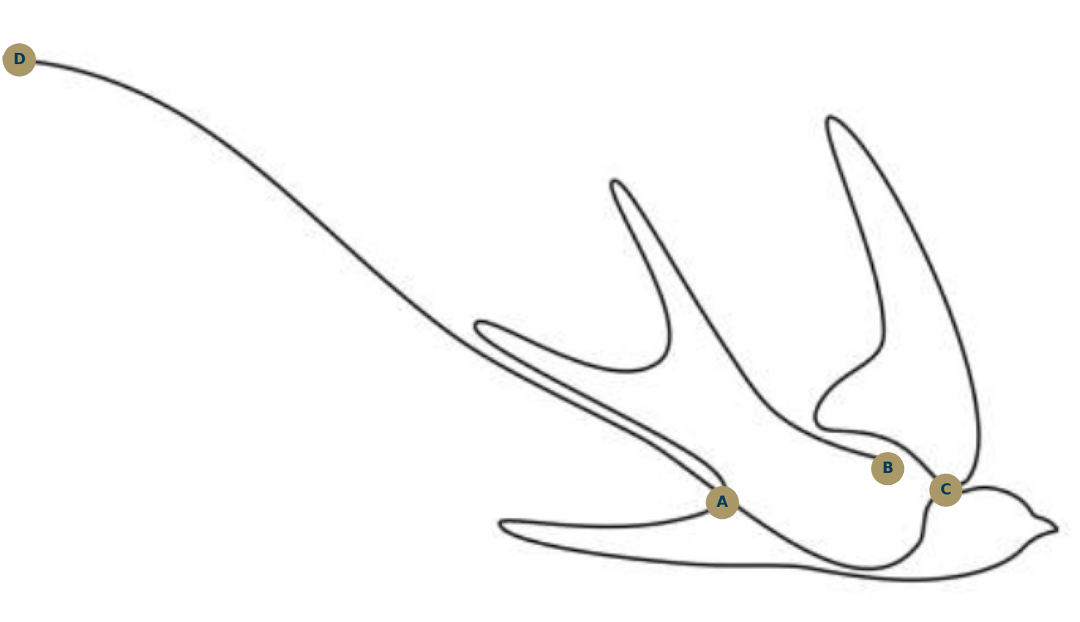

In [6]:
G = nx.MultiGraph()
G.add_edge('D', 'A')
G.add_edge('A', 'C')
G.add_edge('C', 'C')
G.add_edge('C', 'A')
G.add_edge('A', 'B')
nx.has_eulerian_path(G)

True

### Bird 2

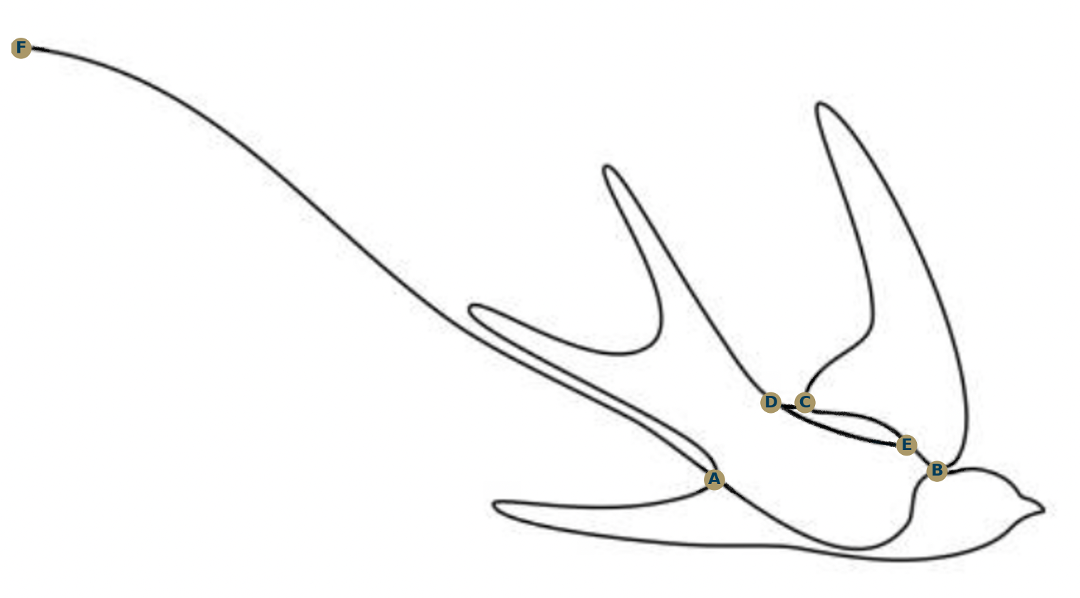

In [8]:
G = nx.MultiGraph()
G.add_edge('F', 'A')
G.add_edge('A', 'B')
G.add_edge('A', 'D')
G.add_edge('D', 'C')
G.add_edge('C', 'B')
G.add_edge('B', 'E')
G.add_edge('C', 'E')
G.add_edge('D', 'E')
nx.has_eulerian_path(G)

False

### Chicken

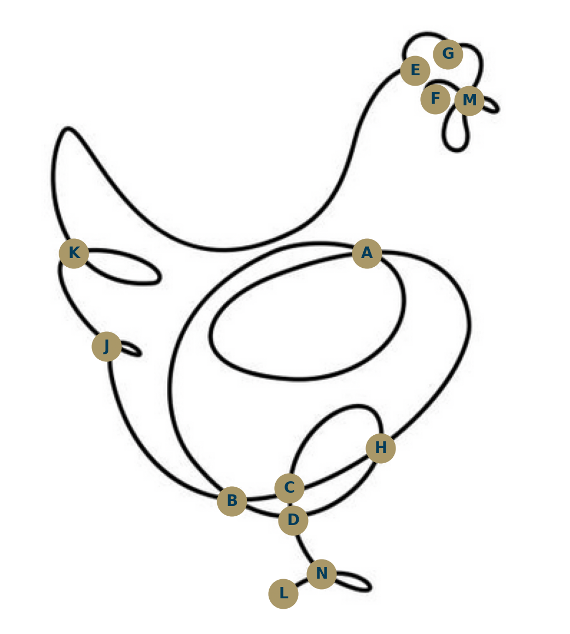

In [10]:
G = nx.MultiGraph()
G.add_edge('F', 'M')
G.add_edge('M', 'M')
G.add_edge('M', 'M')
G.add_edge('M', 'G')
G.add_edge('G', 'E')
G.add_edge('E', 'K')
G.add_edge('K', 'K')
G.add_edge('K', 'J')
G.add_edge('J', 'J')
G.add_edge('J', 'B')
G.add_edge('B', 'A')
G.add_edge('A', 'A')
G.add_edge('A', 'H')
G.add_edge('H', 'C')
G.add_edge('H', 'C')
G.add_edge('H', 'D')
G.add_edge('D', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'N')
G.add_edge('N', 'N')
G.add_edge('N', 'L')
nx.has_eulerian_path(G)

True

### Butterfly

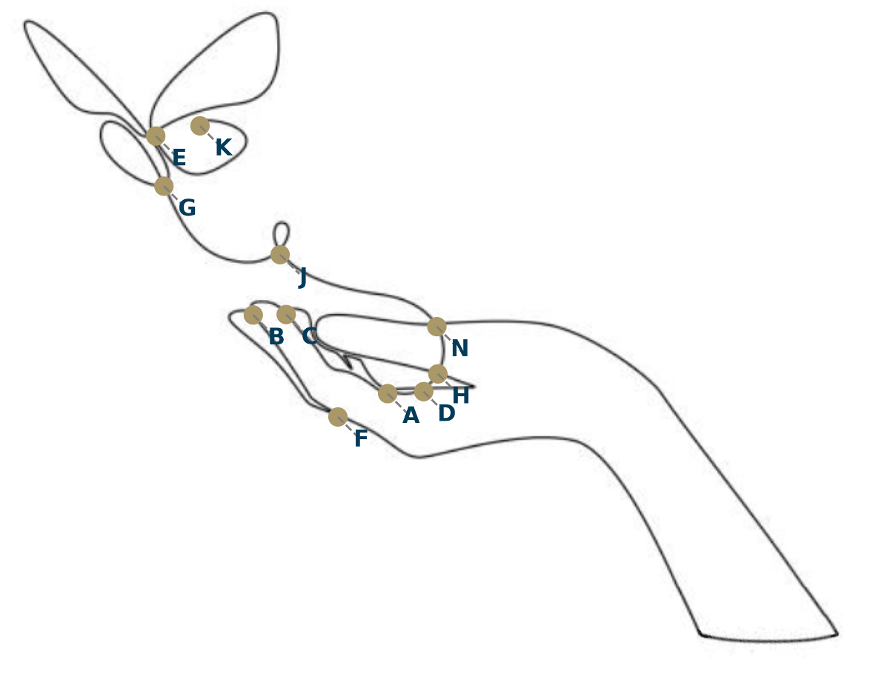

In [13]:
G = nx.MultiGraph()
G.add_edge('K', 'E')
G.add_edge('E', 'E')
G.add_edge('E', 'E')
G.add_edge('E', 'G')
G.add_edge('G', 'G')
G.add_edge('G', 'J')
G.add_edge('J', 'J')
G.add_edge('H', 'D')
G.add_edge('D', 'A')
G.add_edge('D', 'A')
G.add_edge('A', 'C')
G.add_edge('A', 'C')
G.add_edge('C', 'B')
G.add_edge('B', 'F')
G.add_edge('B', 'F')
G.add_edge('F', 'N')
G.add_edge('H', 'N')
G.add_edge('H', 'N')
G.add_edge('J', 'N')
nx.has_eulerian_path(G)

False

### Laptop

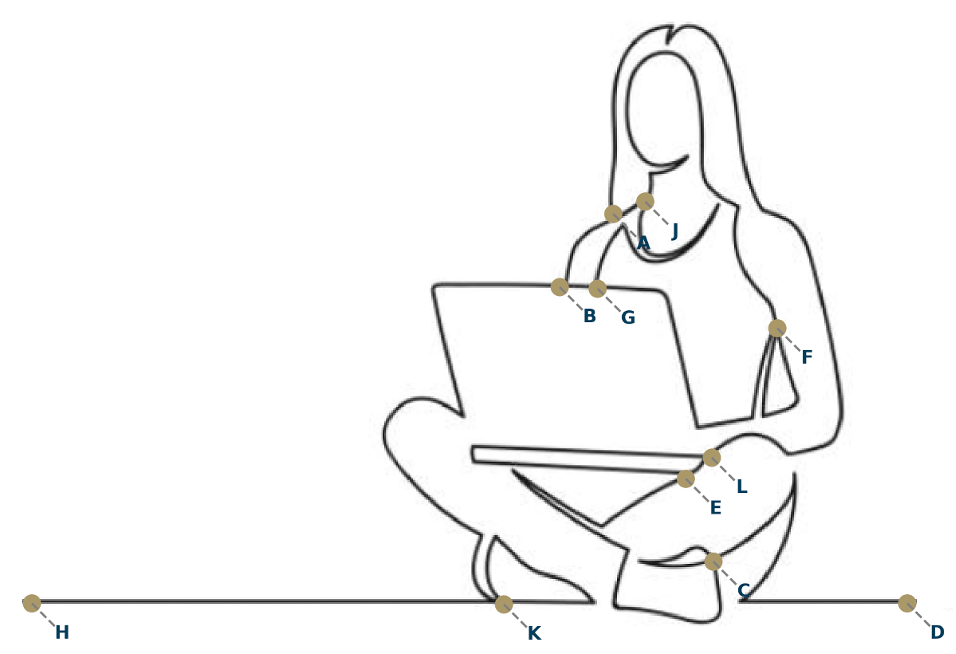

In [15]:
G = nx.MultiGraph()
G.add_edge('H', 'K')
G.add_edge('K', 'K')
G.add_edge('K', 'B')
G.add_edge('B', 'G')
G.add_edge('G', 'F')
G.add_edge('F', 'F')
G.add_edge('F', 'J')
G.add_edge('J', 'G')
G.add_edge('B', 'A')
G.add_edge('A', 'L')
G.add_edge('L', 'E')
G.add_edge('E', 'C')
G.add_edge('C', 'C')
G.add_edge('C', 'D')
nx.has_eulerian_path(G)

False

### Smile

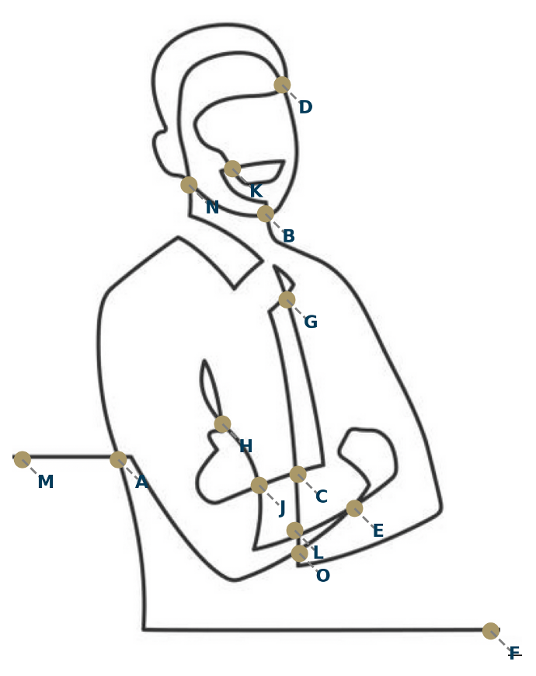

In [17]:
G = nx.MultiGraph()
G.add_edge('M', 'A')
G.add_edge('A', 'N')
G.add_edge('N', 'D')
G.add_edge('N', 'D')
G.add_edge('N', 'B')
G.add_edge('B', 'K')
G.add_edge('K', 'K')
G.add_edge('K', 'D')
G.add_edge('D', 'B')
G.add_edge('B', 'O')
G.add_edge('O', 'E')
G.add_edge('E', 'E')
G.add_edge('E', 'L')
G.add_edge('L', 'J')
G.add_edge('J', 'H')
G.add_edge('J', 'H')
G.add_edge('H', 'H')
G.add_edge('J', 'C')
G.add_edge('C', 'G')
G.add_edge('C', 'G')
G.add_edge('G', 'G')
G.add_edge('C', 'L')
G.add_edge('L', 'O')
G.add_edge('O', 'A')
G.add_edge('A', 'F')
nx.has_eulerian_path(G)

True

# Display Graph Visual



In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

# canvas
canvas = algorithmx.jupyter_canvas()
canvas.size((800, 800))

# nodes
canvas.nodes(G.nodes).add().color('rgb(168, 153, 104)')
canvas.nodes(G.nodes).label().color('black')

# edges
logicDirected = nx.is_directed(G)
init_edges = canvas.edges(G.edges).add().directed(logicDirected).color('rgb(0, 59, 92)')
logicWeighted = False
for e in G.edges :
  if 'weight' in G.edges[e] :
    logicWeighted = True
if logicWeighted :
  init_edges.label().add().color('black').text(lambda e: G.edges[e]['weight'])
logicLabeled = 'edgedict' in locals()
if logicLabeled :
  init_edges.label('centrality').add().color('black').text(lambda e: edgedict[e])

# display
canvas

# Display Graph Table

In [ ]:
print('Vertices')
for n in G.nodes :
  print(n)
print('\n')

logicDirected = nx.is_directed(G)
logicLabeled = 'edgedict' in locals()
logicWeighted = False
for e in G.edges :
  if 'weight' in G.edges[e] :
  #if G.edges[e]['weight'] != 1 :
      logicWeighted = True

print('Edges')
if logicWeighted :
  if logicDirected :
    if logicLabeled :
      print('label = (from vertex, to vertex) : weight')
    else :
      print('(from vertex, to vertex) : weight')
  else :
    if logicLabeled :
      print('label = (vertex, vertex) : weight')
    else :
      print('(vertex, vertex) : weight')
  for e in G.edges :
    if logicLabeled :
      print(f"{edgedict[e]} = ({e[0]},{e[1]}) : {G.edges[e]['weight']}")
    else :
      print(f"({e[0]},{e[1]}) : {G.edges[e]['weight']}")
else :
  if logicDirected :
    if logicLabeled :
      print('label = (from vertex, to vertex)')
    else :
      print('(from vertex, to vertex)')
  else :
    if logicLabeled :
      print('label = (vertex, vertex)')
    else :
      print('(vertex, vertex)')
  for e in G.edges :
    if logicLabeled :
      print(f"{edgedict[e]} = ({e[0]},{e[1]})")
    else :
      print(f"({e[0]},{e[1]})")
